# CS441 Final Project Visualizations: Premier League Predictor

This analysis examines the key factors that influence Premier League team success across multiple seasons. Using a dataset that includes financial investment, managerial history, goal production, defensive statistics, and home and away performance, the study evaluates how these variables relate to total points earned and final league position.

The process begins by loading and preparing the dataset, selecting the most relevant performance, managerial, and financial features, and constructing an enhanced version of the data that includes computed league rankings. Once the data is structured, a series of visualizations and statistical comparisons are used to investigate relationships such as the impact of transfer spending, the value of managerial win percentage, the importance of goal difference, and the balance between home and away results.

Through regression analysis, correlation measurements, and over/under-performance evaluations, the study identifies which factors most strongly differentiate championship-level teams from the rest of the league. The overall goal is to determine how financial resources, managerial quality, and on-field performance combine to shape competitive outcomes.

## Dataset Loading and Initial Preparation

The dataset is first imported and prepared for analysis. This step involves loading the full Premier League performance dataset and selecting the variables most relevant to the study. These variables include metrics related to league performance (such as total points, goals scored, and goals conceded), financial indicators (such as net transfer budget), and managerial characteristics (such as manager win percentage).

By restricting the dataset to only the core features required for modeling and visualization, the analysis ensures consistency, reduces noise, and improves interpretability. This cleaned dataset serves as the foundation for all subsequent statistical evaluations and visual explorations.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")

df = pd.read_csv("final_dataset_for_model.csv")

cols = [
    "Season", "Team",
    "TotalPoints", "HomePoints", "AwayPoints",
    "TotalGoalsScored", "TotalGoalsConceded", "GoalDifference",
    "TransferBudget", "ManagerName", "ManagerWinPercentage",
    "IsWinner", "TeamWinPercentage", "TeamWins", "TotalRedCards"
]
df = df[cols]

df.head()

,Season,Team,TotalPoints,HomePoints,AwayPoints,TotalGoalsScored,TotalGoalsConceded,GoalDifference,TransferBudget,ManagerName,ManagerWinPercentage,IsWinner,TeamWinPercentage,TeamWins,TotalRedCards
0,2010/11,Man United,80,55,25,78,37,41,140,Sir Alex Ferguson,58.1,1,68.4,23,3
1,2010/11,Chelsea,71,45,26,69,33,36,145,Carlo Ancelotti,55.2,0,60.5,21,1
2,2010/11,Man City,71,43,28,60,33,27,195,Roberto Mancini,54.7,0,55.3,21,5
3,2010/11,Arsenal,68,37,31,72,43,29,110,Arsène Wenger,54.0,0,52.6,19,6
4,2010/11,Tottenham,62,36,26,55,46,9,105,Harry Redknapp,40.1,0,50.0,16,2


## Creation of a Season-Ranked Dataset

After the initial filtering, an additional step is performed to compute each team’s final league position within its respective season. This is accomplished by ranking teams according to their total points in descending order. The resulting "LeaguePosition" variable provides a standardized measure of competitive performance, enabling meaningful comparisons across seasons.

The transformed dataset is therefore smaller, more structured, and analytically useful. It captures each club’s performance, financial input, and managerial profile in a format suited for evaluating multi-factor relationships such as the impact of budget, managerial history, and goal metrics on league success.

In [ ]:
df["LeaguePosition"] = (df.groupby("Season")["TotalPoints"].rank(method="first", ascending=False).astype(int)) #
df[["Season", "Team", "TotalPoints", "LeaguePosition"]].head()


,Season,Team,TotalPoints,LeaguePosition
0,2010/11,Man United,80,1
1,2010/11,Chelsea,71,2
2,2010/11,Man City,71,3
3,2010/11,Arsenal,68,4
4,2010/11,Tottenham,62,5


## Transfer Budget vs. Total Points

This visualization examines whether higher transfer spending is associated with higher league performance, and whether diminishing returns appear at higher spending levels. It also sets the foundation for identifying clubs that overperform or underperform relative to their financial investment.

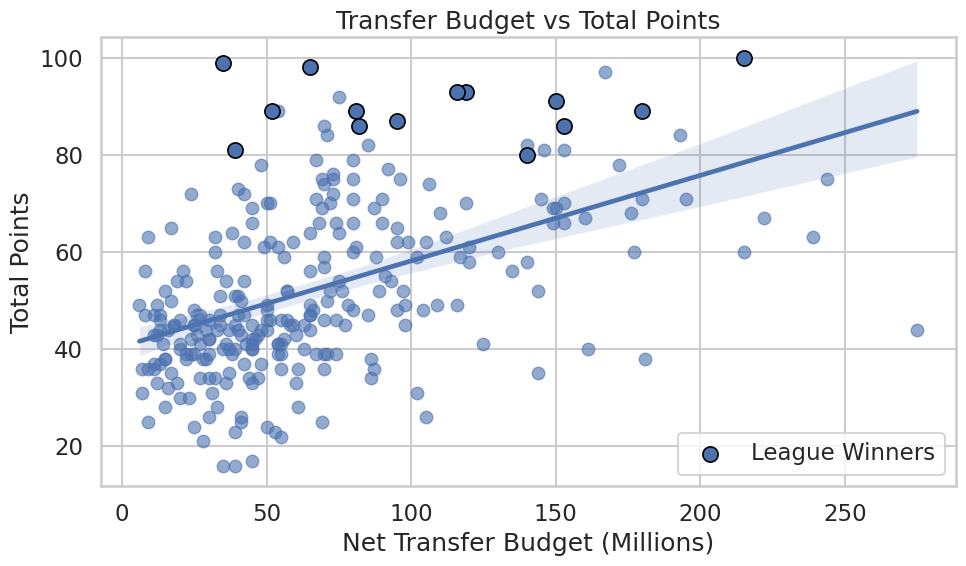

Correlation: 0.491


In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x="TransferBudget", y="TotalPoints", scatter_kws={"alpha": 0.6})

winners = df[df["IsWinner"] == 1]
plt.scatter(winners["TransferBudget"], winners["TotalPoints"], s=120, edgecolor="black", linewidth=1.2, label="League Winners")

plt.title("Transfer Budget vs Total Points")
plt.xlabel("Net Transfer Budget (Millions)")
plt.ylabel("Total Points")
plt.legend()
plt.tight_layout()
plt.show()

corr = df["TransferBudget"].corr(df["TotalPoints"])
print(f"Correlation: {corr:.3f}")

### Does higher spending lead to more points?
The dataset indicates a moderate positive correlation between transfer budget and total points (approximately 0.49). This suggests that higher spending is generally associated with improved league performance, though the relationship is not decisive.

### Is there a threshold where spending shows diminishing returns?
Yes. Once transfer budgets exceed roughly £150–£200 million, the increase in total points begins to flatten. High-spending clubs frequently remain clustered between 75–85 points, indicating diminishing marginal gains from additional spending.

### Which teams overperform or underperform relative to their budget?
The scatterplot reveals notable deviations from the expected trend. Several lower-budget clubs achieve significantly higher point totals than predicted such as Liverpool, Manchester United, and Manchester City, classifying them as overperformers. Conversely, some high-budget teams earn fewer points than expected like Chelsea, Nottingham Forest, and Fulham, indicating underperformance relative to financial investment.

## Manager Win Percentage vs. Total Points

This visualization evaluates whether managers with stronger historical win percentages tend to produce better seasonal outcomes in terms of total league points.

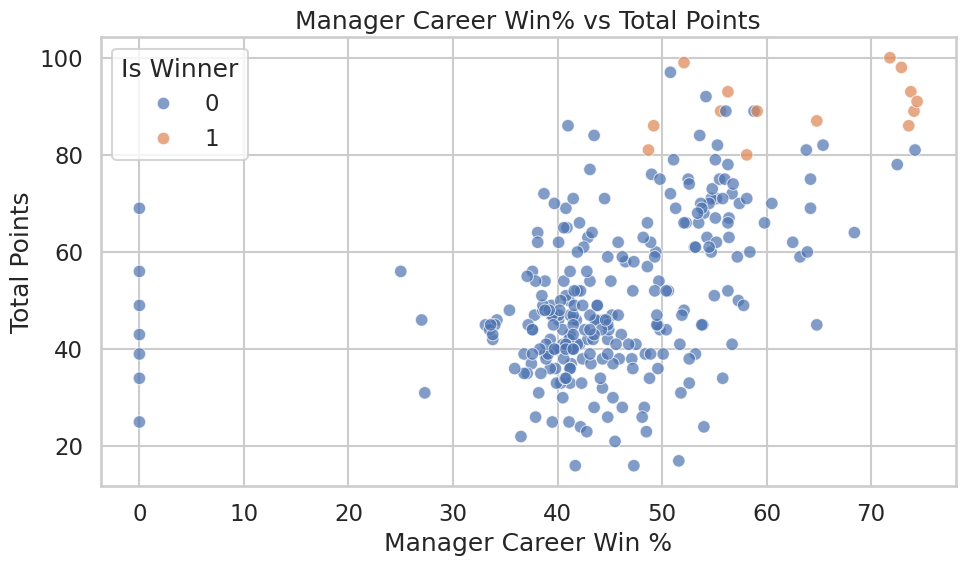

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="ManagerWinPercentage", y="TotalPoints", hue="IsWinner", alpha=0.7)

plt.title("Manager Career Win% vs Total Points")
plt.xlabel("Manager Career Win %")
plt.ylabel("Total Points")
plt.legend(title="Is Winner")
plt.tight_layout()
plt.show()


### Do managers with better historical records deliver better results?
The visualization shows a clear upward trend: higher manager win percentages align with higher seasonal point totals. League-winning teams generally fall within the upper range of managerial win rates.

### How much does managerial experience matter compared to squad quality?
While a positive relationship exists, the effect of managerial win percentage is weaker than goal-scoring and defensive metrics. Attacking output and goal difference exhibit substantially stronger correlations with league points, indicating that squad performance exerts the greater influence.

## Goal Difference vs. League Position

This visualization assesses how goal difference separates top-performing teams from the rest of the league and how closely goal metrics correlate with final standings.

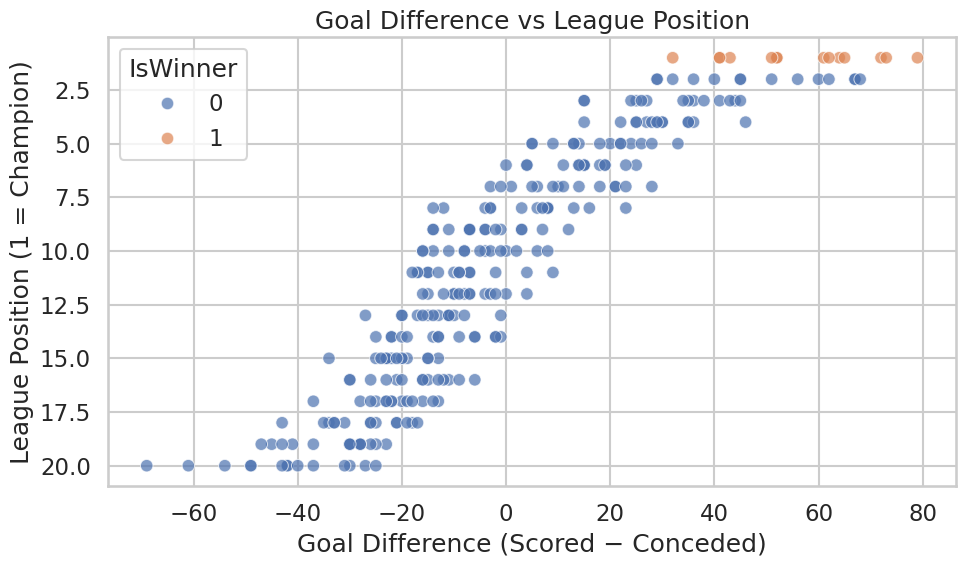

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="GoalDifference", y="LeaguePosition", hue="IsWinner", alpha=0.7)

plt.gca().invert_yaxis()
plt.title("Goal Difference vs League Position")
plt.xlabel("Goal Difference (Scored − Conceded)")
plt.ylabel("League Position (1 = Champion)")
plt.tight_layout()
plt.show()


### What goal difference typically separates winners from runners-up?
League champions generally record goal differences above +40, while second-place teams typically fall between +25 and +35. This suggests a typical gap of 10–20 goals.

### Is defensive strength or attacking power more predictive of success?
Goal-scoring exhibits a correlation of approximately +0.90 with points, while goals conceded show a correlation of roughly −0.82. Both are highly predictive, but attacking strength displays the slightly stronger relationship.

## Goals Scored and Goals Conceded vs. Points

This visualization analyzes the relative influence of attacking output and defensive solidity on total league points.

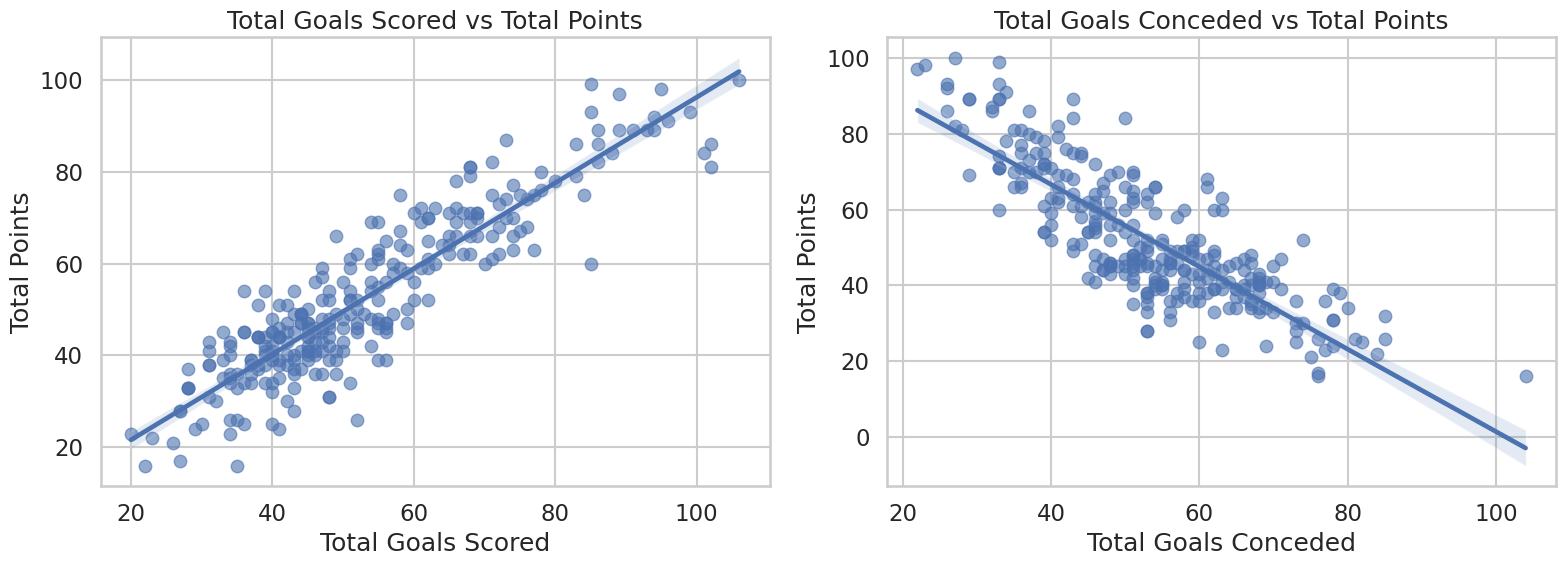

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.regplot(data=df, x="TotalGoalsScored", y="TotalPoints", scatter_kws={"alpha": 0.6}, ax=axes[0])
axes[0].set_title("Total Goals Scored vs Total Points")
axes[0].set_xlabel("Total Goals Scored")
axes[0].set_ylabel("Total Points")

sns.regplot(data=df, x="TotalGoalsConceded", y="TotalPoints", scatter_kws={"alpha": 0.6}, ax=axes[1])
axes[1].set_title("Total Goals Conceded vs Total Points")
axes[1].set_xlabel("Total Goals Conceded")
axes[1].set_ylabel("Total Points")

plt.tight_layout()
plt.show()


### Which metric is more predictive of points: goals scored or goals conceded?
Goals scored demonstrate the strongest relationship with total points, indicating that attacking performance is slightly more influential than defensive performance. However, both metrics show strong correlations, confirming that balanced goal production and prevention underpin high league finishes.

## Home vs. Away Performance

This visualization compares home and away point totals to assess whether league champions perform consistently across both environments.

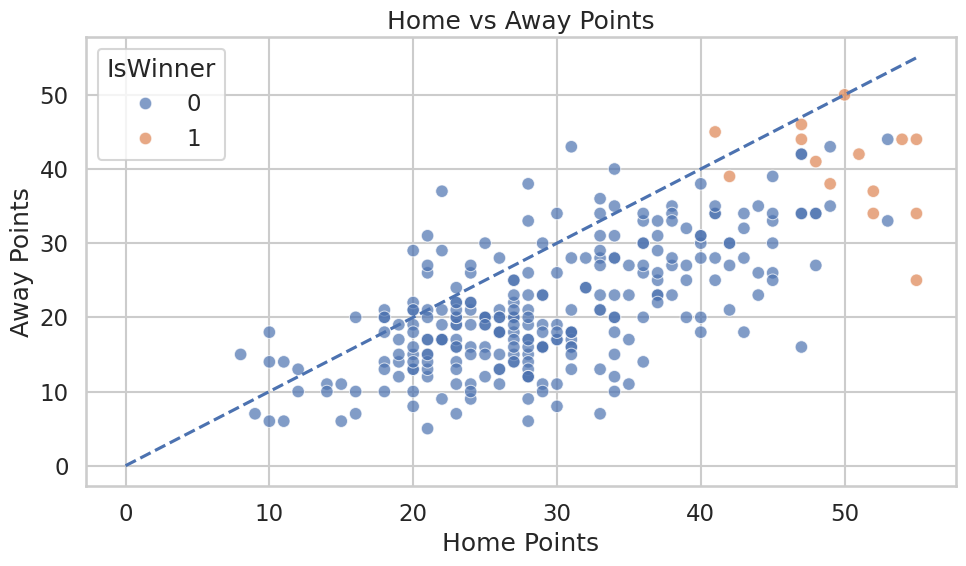

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="HomePoints", y="AwayPoints", hue="IsWinner", alpha=0.7)

max_points = max(df["HomePoints"].max(), df["AwayPoints"].max())
plt.plot([0, max_points], [0, max_points], linestyle="--")

plt.title("Home vs Away Points")
plt.xlabel("Home Points")
plt.ylabel("Away Points")
plt.tight_layout()
plt.show()


### Do champions maintain consistent performance at home and away?
Yes. League winners cluster in the upper-right region of the plot, indicating strong performance in both home and away matches. Non-champions generally show greater imbalance, particularly weaker away form.

### How important is home strength versus away form?
While most teams perform better at home, strong away performance is the key distinguishing factor among champions. Title-winning sides tend to perform reliably regardless of venue.

### Red Cards vs League Placement

Purpose: To analyze whether more red cards correlate with weaker league finishes, and whether discipline impacts position within a season.

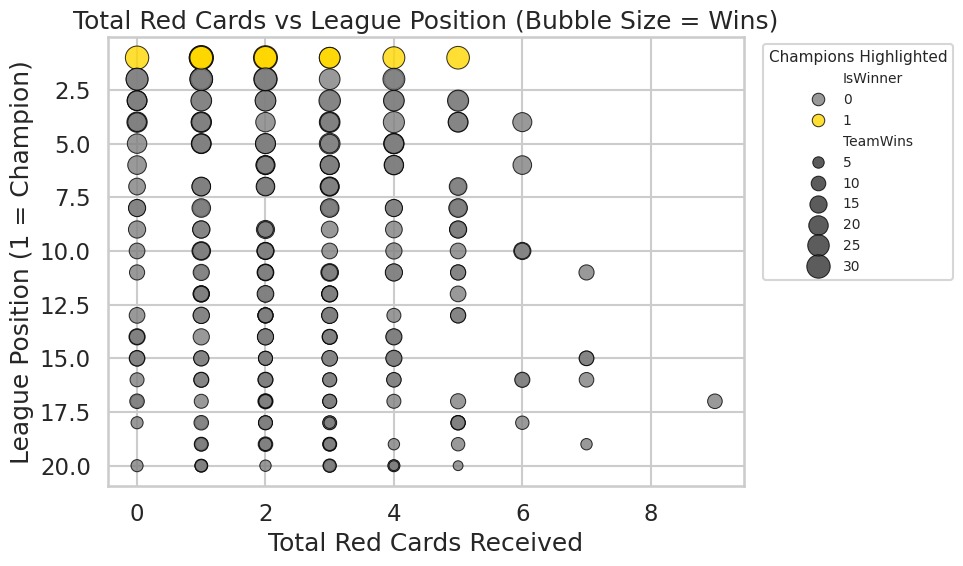

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x="TotalRedCards",
    y="LeaguePosition",
    size="TeamWins",
    hue="IsWinner",
    sizes=(50, 300),
    palette=["gray","gold"],
    edgecolor="black",
    alpha=0.8
)

plt.gca().invert_yaxis()
plt.title("Total Red Cards vs League Position (Bubble Size = Wins)")
plt.xlabel("Total Red Cards Received")
plt.ylabel("League Position (1 = Champion)")
plt.legend(title="Champions Highlighted", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()


This chart visualizes discipline by plotting total red cards against league position, where smaller values on the y-axis represent higher finishes. Bubble size reflects total wins, and champions are highlighted in gold. Most title-winning teams cluster toward the top of the chart with medium-to-lower red card totals, indicating that successful teams tend to maintain discipline. By contrast, teams collecting more red cards generally appear deeper in the table, with fewer wins and poorer finishing positions. This suggests that reducing red card incidents may support more consistent results across a season.

In [ ]:
# from https://gist.github.com/jonathanagustin/b67b97ef12c53a8dec27b343dca4abba
# For use in Colab.  For local, just use jupyter nbconvert directly

import os
# @title Convert Notebook to PDF. Save Notebook to given directory
NOTEBOOKS_DIR = "/content/drive/My Drive/CS441/project" # @param {type:"string"}
NOTEBOOK_NAME = "441 final project visualizations.ipynb" # @param {type:"string"}
#------------------------------------------------------------------------------#
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)
NOTEBOOK_PATH = f"{NOTEBOOKS_DIR}/{NOTEBOOK_NAME}"
assert os.path.exists(NOTEBOOK_PATH), f"NOTEBOOK NOT FOUND: {NOTEBOOK_PATH}"
!apt install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic > /dev/null 2>&1
!apt install pandoc > /dev/null 2>&1
!jupyter nbconvert "$NOTEBOOK_PATH" --to pdf > /dev/null 2>&1
NOTEBOOK_PDF = NOTEBOOK_PATH.rsplit('.', 1)[0] + '.pdf'
assert os.path.exists(NOTEBOOK_PDF), f"ERROR MAKING PDF: {NOTEBOOK_PDF}"
print(f"PDF CREATED: {NOTEBOOK_PDF}")

MessageError: Error: credential propagation was unsuccessful